<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://drive.google.com/uc?export=view&id=1Ha4ZjgvrlWHQ5vV_VydBkxiFXdgDn8TT" width = "200" align="center"/>


El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [ ]:
# librerias

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [ ]:
# cargar datos
data = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data.head()

### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**:
    * Descripción: Nombre de la especie de Iris.
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**:
    * Descripción: largo del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**:
    * Descripción: ancho del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**:
    * Descripción: largo del pétalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**:
    * Descripción: ancho del pépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores `nan`.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [58]:
df = data['species']
df = df.str.lower().str.replace(' ','').fillna('default')
df.unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

In [59]:
df.value_counts()

,count
species,
setosa,50
virginica,50
versicolor,49
default,1


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

In [74]:
data = data.fillna(0)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica
...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,Setosa
146,4.8,3.0,1.4,0.1,Setosa
147,4.9,3.1,1.5,0.1,Setosa
148,4.9,3.6,1.4,0.1,setosa


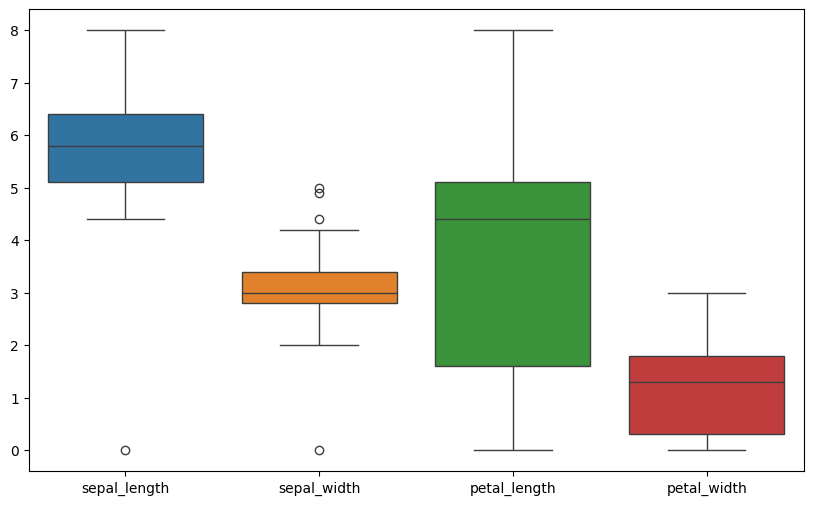

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(data)
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [88]:
# agregamos columna label

conditions =[(4.0 > data['sepal_length']) |
              (data['sepal_length'] > 7.0) ,
              (2.0 > data['sepal_width']) |
              (data['sepal_width'] > 4.5) ,
              (0.1 > data['petal_width']) |
              (data['petal_width'] > 2.5),
              (data['petal_length'] > 7.0) |
              (1.0 > data['petal_length'])
              ]
result = ['out of range','out of range','out of range','out of range']

data['label'] = np.select(conditions,result,default = 'in range')
data

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,4.4,3.2,1.3,3.0,setosa,out of range
1,7.2,3.6,6.1,2.5,virginica,out of range
2,6.3,3.3,6.0,2.5,VIRGINICA,in range
3,6.7,3.3,5.7,2.5,virginica,in range
4,6.3,3.4,5.6,2.4,virginica,in range
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,Setosa,in range
146,4.8,3.0,1.4,0.1,Setosa,in range
147,4.9,3.1,1.5,0.1,Setosa,in range
148,4.9,3.6,1.4,0.1,setosa,in range


4. Realice un gráfico de *sepal_length* vs *petal_length* y otro de *sepal_width* vs *petal_width* categorizados por la etiqueta **label**. Concluya sus resultados.

In [ ]:
# FIXME

5. Filtre los datos válidos y realice un gráfico de *sepal_length* vs *petal_length* categorizados por la etiqueta **species**.

In [ ]:
# FIXME